##### Κρικέλης Λάμπρος 
ΑΜ: 01852

# Project For the Subject Computetional Vision 

## Ιmage formation from a central projection camera (pinhole camera)

### Generally 

You can find the 3d model representing an upright man in the .stl file. 

#### Steps to fulfil the project
 
1. Read the .stl file    
    1.1 Explain the structure of the file     
    1.2 Find the number of triangles (Faces) and the vertices of the model.
2. Visualize the model
3. Utilize the faces and nodes of the model to create 4 replicas next to each other
4. Create a matrix 4x4 named Pextr = [[3x3],[3x1]] adding a matrix 1x4 as a last row [ 0 0 0 1]     
    4.1 The 3x3 matrix R = Ry(-θ)Rx(θ) θ = 90deg.    
    4.2 The 3x1 matrix T = -R[[-2],[0.8],[0]]
5. Lastly, Create a matrix Q' 4xN  Q' = Pextr Q 
   5.1 To create the Q matrix Q 4xN -> The 3xN is the vertices that you used to visualize the 4 replicas of the model on step 3. and the lat row comes through the array of ones 1xN.  
   5.2 Then you take the Q' and try to make homogonous points by dividing the zn axis with the xn,zn. Through that procces we went from 4xN to 2xN matrix where 2 is the vector quantity u,y    

Please insert the FIRE FOLDER under this dir to run the below notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from stl import mesh 

In [2]:
# Load the STL file

# Step 1.
stl_file = "man_small.stl"
mesh = mesh.Mesh.from_file(stl_file)

In [3]:

'''We  have to keep in mind that the 3d models are created by a pleuthora of triangles one next to each other.
Therefore we can conclude that the vertices of the model will be the number of triangles times the 3. 
Because a triangle has 3 vertices, the point where the edges meet.
'''
# Get all vertices (flattened array with duplicates)
triangles = mesh.vectors
vertices = triangles.reshape(-1, 3)
num_triangles = len(triangles)
num_vertices = len(vertices)
print(f"All vertices (total count, including duplicates): {num_vertices}")
print(f"Number of triangles: {num_triangles}")

print(f"\n {triangles[1::]}")
print(f"\n {triangles.shape}")


All vertices (total count, including duplicates): 38682
Number of triangles: 12894

 [[[ 0.401519 -0.092442 -0.007728]
  [ 0.40184  -0.0916   -0.025148]
  [ 0.41113  -0.081747 -0.022418]]

 [[ 0.401519 -0.092442 -0.007728]
  [ 0.41113  -0.081747 -0.022418]
  [ 0.414627 -0.079491 -0.005096]]

 [[ 0.401519 -0.092442 -0.007728]
  [ 0.414627 -0.079491 -0.005096]
  [ 0.412111 -0.078172  0.008738]]

 ...

 [[ 0.262201 -0.16417  -0.927242]
  [ 0.251608 -0.161179 -0.933126]
  [ 0.265505 -0.160401 -0.931109]]

 [[ 0.262201 -0.16417  -0.927242]
  [ 0.250707 -0.160937 -0.925597]
  [ 0.251608 -0.161179 -0.933126]]

 [[ 0.241979 -0.16783  -0.936084]
  [ 0.251608 -0.161179 -0.933126]
  [ 0.240081 -0.167493 -0.926844]]]

 (12894, 3, 3)


In [4]:
''' I am using the below cell to troubleshoot '''
print(f"\n {vertices[:]}")
print(f"\n {vertices.shape}")
verticesT= vertices.T
print(f"\n {verticesT}")


 [[-0.002431 -0.112964 -0.105936]
 [-0.007853 -0.102539 -0.112853]
 [ 0.021595 -0.101415 -0.109205]
 ...
 [ 0.241979 -0.16783  -0.936084]
 [ 0.251608 -0.161179 -0.933126]
 [ 0.240081 -0.167493 -0.926844]]

 (38682, 3)

 [[-0.002431 -0.007853  0.021595 ...  0.241979  0.251608  0.240081]
 [-0.112964 -0.102539 -0.101415 ... -0.16783  -0.161179 -0.167493]
 [-0.105936 -0.112853 -0.109205 ... -0.936084 -0.933126 -0.926844]]


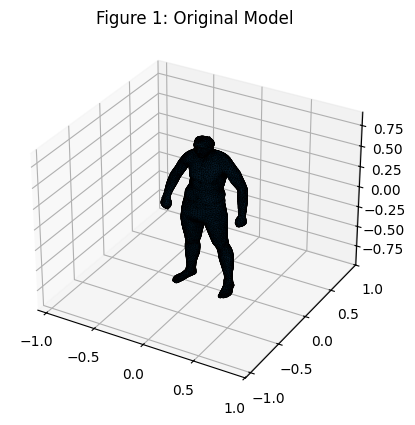

In [5]:
# Step 2.
'''
    Below I am using the triangles from step 1 To Visualize the 3D model 
'''

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Construct the 3D mesh for plotting
# Here I am using the a for loop to go through each dimension of the model 
poly3d = [[list(triangle[0]), list(triangle[1]), list(triangle[2])] for triangle in triangles]
ax.add_collection3d(Poly3DCollection(poly3d, alpha=0.5, edgecolor='k'))

# # Set limits. To keep the mdoel in bounderies.
scale = np.concatenate([vertices[:, 0], vertices[:, 1], vertices[:, 2]])
ax.auto_scale_xyz(scale, scale, scale)

# Plot title and show
plt.title("Figure 1: Original Model")
plt.show()


In [6]:
# Step 3.
# Create the spaces between each model 
translations = [
    np.array([0.0, 0, 0]),  # Original position
    np.array([1.5, 0, 0]),  # shifted along +X
    np.array([3, 0, 0]),    # shifted along +X
    np.array([4.5, 0, 0])   # shifted along +X
]

In [7]:
# Create lists to store all vertices and faces for the models
all_vertices = []
all_faces = []

# Loop over the translations to create 4 models
'''With the function enumerate I am telling the code to go and search for the object X
and loop create a value int  equal to the object entries.  
'''
for i, t in enumerate(translations):
    
    '''Below Translate the vertices based on translation first entry
    e.g. vertex=[x,y,z],t=[dx,dy,dz](from translations) ⟹ new vertex=[x+dx,y+dy,z+dz]
    '''
    translated_vertices = vertices + t
    all_vertices.append(translated_vertices)
    
    # Adjust face indices for the new set of vertices
    '''We need the offset to set the pointer to where the array is going to look to check '''
    offset = len(vertices) * i
    
    # Correct face indices by applying the offset to the original face indices
    translated_faces = []
    for face in triangles:
        # Since face contains coordinates, not indices, we need to find the indices
        # Add the offset to the index
        translated_faces.append([
            int(np.where(np.all(vertices == face[0], axis=1))[0][0] + offset),  
            int(np.where(np.all(vertices == face[1], axis=1))[0][0] + offset),  
            int(np.where(np.all(vertices == face[2], axis=1))[0][0] + offset)   
        ])
    all_faces.append(np.array(translated_faces, dtype=int))

# Combine all vertices and faces into single arrays
all_vertices = np.vstack(all_vertices)
all_faces = np.vstack(all_faces)

# Ensure faces have the correct shape and are valid
print(f"Shape of all_faces: {all_faces.shape}")
print(f"Shape of all_vertices: {all_vertices.shape}")

Shape of all_faces: (51576, 3)
Shape of all_vertices: (154728, 3)


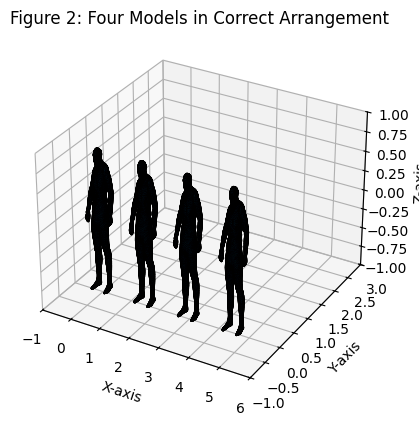

In [8]:
# Visualize the new arrangement
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Convert faces to polygons for plotting (ensure poly3d is correctly structured)
poly3d = []
for face in all_faces:
    poly3d.append([all_vertices[vertex] for vertex in face])

# Check poly3d shape before plotting
# print(f"poly3d length: {len(poly3d)}")
# print(f"First face: {poly3d[0]}")

# Add faces to the plot
ax.add_collection3d(Poly3DCollection(poly3d, alpha=0.5, edgecolor='k'))

# Adjust scale for visualization to fit the 4 models 
ax.set_xlim(-1, 6)  
ax.set_ylim(-1, 3)  
ax.set_zlim(-1, 1)  

# Set labels and title
plt.title("Figure 2: Four Models in Correct Arrangement")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
ax.set_zlabel("Z-axis")

plt.show()

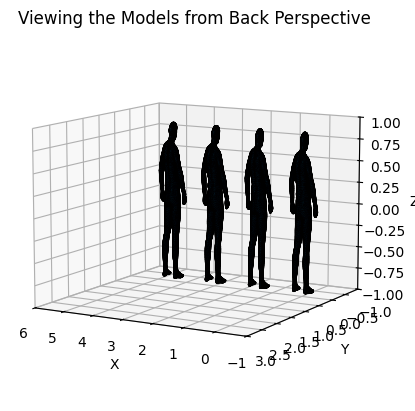

In [9]:
# Visualize the new arrangement
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Convert faces to polygons for plotting
poly3d = [[all_vertices[vertex] for vertex in face] for face in all_faces]  # Ensure indices match vertices
ax.add_collection3d(Poly3DCollection(poly3d, alpha=0.5, edgecolor='k'))


# Adjust scale for visualization (match the proportions in the photo)
ax.set_xlim(-1, 6)  
ax.set_ylim(-1, 3)  
ax.set_zlim(-1, 1)  

'''This is how this plot differ from the above.
With the line below we can rotate the point of view of the model based on:
elev -> stands for elevation and 
Azim -> stands for azimuth, and the value it gets is an integer representing degrees.'''
ax.view_init(elev=10, azim=120)


ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.title("Viewing the Models from Back Perspective")
plt.show()

In [10]:
# Step 4. 

'''Create the rotation function in 3D'''
def rotation_matrix_x(theta):
    '''Returns the rotation matrix for a rotation about the x-axis by theta degrees'''
    rad = np.radians(theta)
    print(rad)
    return np.array([
        [1, 0, 0],
        [0, np.cos(rad), -np.sin(rad)],
        [0, np.sin(rad), np.cos(rad)]
    ])

def rotation_matrix_y(theta):
    '''Returns the rotation matrix for a rotation about the y-axis by theta degrees'''
    rad = np.radians(theta)
    print(rad)
    ans = np.cos(rad)
    print(ans)
    return np.array([
        [np.cos(rad), 0, np.sin(rad)],
        [0, 1, 0],
        [-np.sin(rad), 0, np.cos(rad)]
    ])  

In [11]:
# R table creation. Step 4.1.

# Combine the rotation matrices to the above functions. Deg.
Ry_minus_90 = rotation_matrix_y(-90) # Ry(-90)
Rx_90 = rotation_matrix_x(90)        # Rx(90)
print("\nBelow is the Rx_90 ")
print(Rx_90)
print("\nBelow is the Ry_minus_90 ")

print(Ry_minus_90)

R = Ry_minus_90 @ Rx_90              # Final rotation matrix

print("Rotation Matrix R = Ry(-90)Rx(90):")
print(R)


# Step 4.2: crate the vector tx,ty,tz
camera_position = np.array([-2, 0, 0])
camera_position = camera_position.reshape(-1,1)
# Point to transform: P = [-2, 0.8, 0]
point_ans = np.array([-2.0, 0.8, 0.0])
point_ans = point_ans.reshape(-1, 1)

print("\nBelow is the point_ans ")
print(point_ans)
print(point_ans.shape)
# Compute the transformed point: -R * P


transformed_point = -R @ point_ans
print(f"Camera set at {camera_position}")
print("\nTransformed Point (-R * [-2, 0.8, 0]^T):")
print(transformed_point)
print("\n")
print(-R)



-1.5707963267948966
6.123233995736766e-17
1.5707963267948966

Below is the Rx_90 
[[ 1.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00]
 [ 0.000000e+00  1.000000e+00  6.123234e-17]]

Below is the Ry_minus_90 
[[ 6.123234e-17  0.000000e+00 -1.000000e+00]
 [ 0.000000e+00  1.000000e+00  0.000000e+00]
 [ 1.000000e+00  0.000000e+00  6.123234e-17]]
Rotation Matrix R = Ry(-90)Rx(90):
[[ 6.12323400e-17 -1.00000000e+00 -6.12323400e-17]
 [ 0.00000000e+00  6.12323400e-17 -1.00000000e+00]
 [ 1.00000000e+00  6.12323400e-17  3.74939946e-33]]

Below is the point_ans 
[[-2. ]
 [ 0.8]
 [ 0. ]]
(3, 1)
Camera set at [[-2]
 [ 0]
 [ 0]]

Transformed Point (-R * [-2, 0.8, 0]^T):
[[ 8.0000000e-01]
 [-4.8985872e-17]
 [ 2.0000000e+00]]


[[-6.12323400e-17  1.00000000e+00  6.12323400e-17]
 [-0.00000000e+00 -6.12323400e-17  1.00000000e+00]
 [-1.00000000e+00 -6.12323400e-17 -3.74939946e-33]]


In [12]:
# Last step to create the Pextr matrix. 

# Combine R and transformed_point[tx,ty,tz] to form a 3x4 matrix
Pextr_ans = np.hstack((R, transformed_point))

# Add the last row [0, 0, 0, 1] to form a 4x4 matrix
Pextr = np.vstack((Pextr_ans, [0, 0, 0, 1]))

# Display the resulting matrix
print("Pextr (4x4 matrix): ")
print(Pextr)
print("\n")
print(Pextr_ans)
print("\n")
print(transformed_point)

Pextr (4x4 matrix): 
[[ 6.12323400e-17 -1.00000000e+00 -6.12323400e-17  8.00000000e-01]
 [ 0.00000000e+00  6.12323400e-17 -1.00000000e+00 -4.89858720e-17]
 [ 1.00000000e+00  6.12323400e-17  3.74939946e-33  2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


[[ 6.12323400e-17 -1.00000000e+00 -6.12323400e-17  8.00000000e-01]
 [ 0.00000000e+00  6.12323400e-17 -1.00000000e+00 -4.89858720e-17]
 [ 1.00000000e+00  6.12323400e-17  3.74939946e-33  2.00000000e+00]]


[[ 8.0000000e-01]
 [-4.8985872e-17]
 [ 2.0000000e+00]]


C:\Users\ritod\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


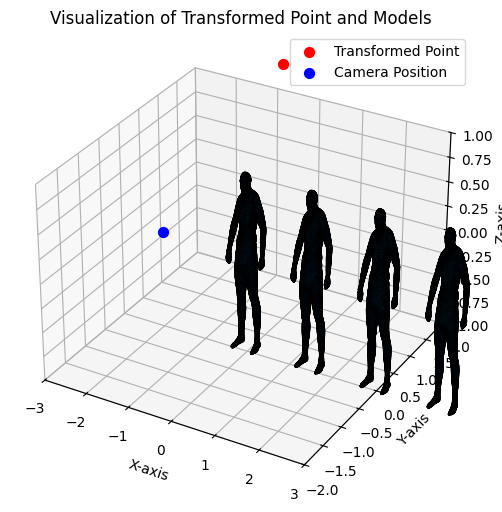

In [13]:
#  Plotting the models and points
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
'''As the aboveplot for 3d models below
  we are displaying the models and pointing out the point of view.
  (-2,0,0),  and the (tx,ty,tz) point that we found in the above cell 
 
'''
if all_faces.size > 0 and all_vertices.size > 0:
    poly3d = [[all_vertices[vertex] for vertex in face] for face in all_faces]
    ax.add_collection3d(Poly3DCollection(poly3d, alpha=0.5, edgecolor='k'))
else:
    print("Error: Models could not be rendered. Check all_faces and all_vertices.")

# Plot the transformed point
ax.scatter(*transformed_point, color='red', s=50, label="Transformed Point")

# Plot the camera position
ax.scatter(*camera_position, color='blue', s=50, label="Camera Position")

# Adjust the plot limits
ax.set_xlim(-3, 3)
ax.set_ylim(-2, 2)
ax.set_zlim(-1, 1)

# Viewpoint configuration
# ax.view_init(elev=20, azim=30)  

# Labels and legend
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.legend()

plt.title("Visualization of Transformed Point and Models")
plt.show()


Camera view set: Azimuth=180.00°, Elevation=0.00°


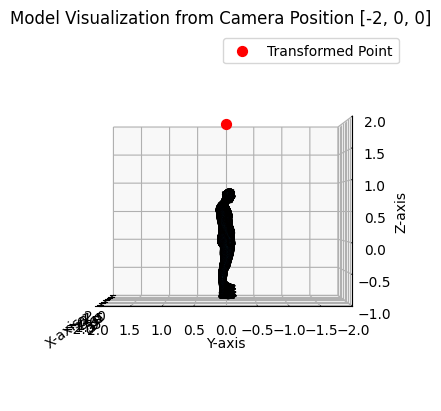

In [14]:
'''Below We are plotting the models from  set as default point (-2,0,0) '''
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

if all_faces.size > 0 and all_vertices.size > 0:
    try:
        poly3d = [[all_vertices[vertex] for vertex in face] for face in all_faces]
        ax.add_collection3d(Poly3DCollection(poly3d, alpha=0.5, edgecolor='k'))
    except IndexError as e:
        print("Error: Invalid index in all_faces or all_vertices. Check data consistency.")
        print("Details:", e)
else:
    print("Error: Models could not be rendered. Check all_faces and all_vertices.")


transformed_point = np.array(transformed_point).flatten()
ax.scatter(*transformed_point, color='red', s=50, label="Transformed Point")

camera_position = np.array([-2, 0, 0])  # Camera position


'''We need to convert the vector -2,0,0 into deg.  [Documentation for convartion](https://stackoverflow.com/questions/51358324/get-vector-angle-by-python)
We can think the below trigonometry method as follows. 
The arc tan is the right and left on the x - y axis 
and the arc sin how much up are we going on the 3D world. 
'''
camera_position = np.array([-2, 0, 0])
azim = np.degrees(np.arctan2(camera_position[1], camera_position[0]))               
elev = np.degrees(np.arcsin(camera_position[2] / np.linalg.norm(camera_position)))  
ax.view_init(elev=elev, azim=azim)


print(f"Camera view set: Azimuth={azim:.2f}°, Elevation={elev:.2f}°")

# Plot settings
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-1, 2)

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.legend()

plt.title("Model Visualization from Camera Position [-2, 0, 0]")
plt.show()


Camera view set: Azimuth=-0.00°, Elevation=68.20°


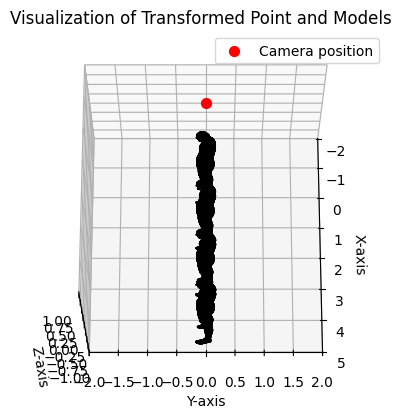

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Ensure all_faces and all_vertices are valid
if all_faces.size > 0 and all_vertices.size > 0:
    try:
        poly3d = [[all_vertices[vertex] for vertex in face] for face in all_faces]
        ax.add_collection3d(Poly3DCollection(poly3d, alpha=0.5, edgecolor='k'))
    except IndexError as e:
        print("Error: Invalid index in all_faces or all_vertices. Check data consistency.")
        print("Details:", e)
else:
    print("Error: Models could not be rendered. Check all_faces and all_vertices.")

# Ensure transformed_point is valid
transformed_point = np.array(transformed_point).flatten()  
# Ensure it's 3D
if transformed_point.shape[0] != 3:
    raise ValueError("Transformed point must have exactly three components.")

# Plot the transformed point
ax.scatter(*camera_position, color='red', s=50, label="Camera position")

# Set the camera view to look from the transformed point
elev = np.degrees(np.arcsin(transformed_point[2] / np.linalg.norm(transformed_point)))  # Elevation based on Z
azim = np.degrees(np.arctan2(transformed_point[1], transformed_point[0]))              # Azimuth based on X, Y
ax.view_init(elev=elev, azim=azim)

print(f"Camera view set: Azimuth={azim:.2f}°, Elevation={elev:.2f}°")


# Adjust the plot visual limits
ax.set_xlim(-2, 5)
ax.set_ylim(-2, 2)
ax.set_zlim(-1, 1)

# 
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.legend()

plt.title("Visualization of Transformed Point and Models")
plt.show()

In [16]:
transformed_point

array([ 8.0000000e-01, -4.8985872e-17,  2.0000000e+00])

Camera view set: Azimuth=0.00°, Elevation=0.00°


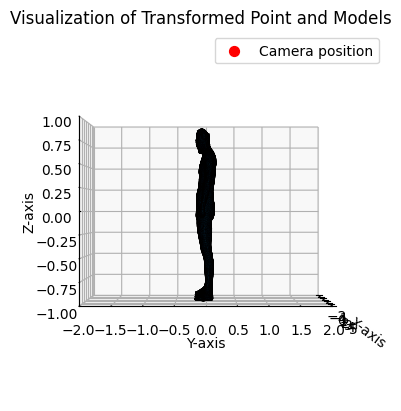

In [17]:
# The only perpuse of the below plot is to check if the trigonometry functions are working properly 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Ensure all_faces and all_vertices are valid
if all_faces.size > 0 and all_vertices.size > 0:
    try:
        poly3d = [[all_vertices[vertex] for vertex in face] for face in all_faces]
        ax.add_collection3d(Poly3DCollection(poly3d, alpha=0.5, edgecolor='k'))
    except IndexError as e:
        print("Error: Invalid index in all_faces or all_vertices. Check data consistency.")
        print("Details:", e)
else:
    print("Error: Models could not be rendered. Check all_faces and all_vertices.")

# Ensure transformed_point is valid
transformed_point = np.array(transformed_point).flatten()  
# Ensure it's 3D
if transformed_point.shape[0] != 3:
    raise ValueError("Transformed point must have exactly three components.")

# Plot the transformed point
ax.scatter(*camera_position, color='red', s=50, label="Camera position")


test_camera = np.array([1, 0, 0])
# Set the camera view to look from the transformed point
elev = np.degrees(np.arcsin(test_camera[2] / np.linalg.norm(test_camera)))  # Elevation based on Z
azim = np.degrees(np.arctan2(test_camera[1], test_camera[0]))              # Azimuth based on X, Y
ax.view_init(elev=elev, azim=azim)

print(f"Camera view set: Azimuth={azim:.2f}°, Elevation={elev:.2f}°")


# Adjust the plot visual limits
ax.set_xlim(-2, 5)
ax.set_ylim(-2, 2)
ax.set_zlim(-1, 1)

# 
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.legend()

plt.title("Visualization of Transformed Point and Models")
plt.show()

In [18]:
#Step 5.
#  We are now Try to create the Q' matrix. Q' = Pextr Q


#Create the matrix Q of 3D vertices with a 1 in the last row.
#(homogeneous coordinates) from task 3.
'''
We are reversed the all_vetrices table because we need an array with N columns and 3 rows.
the last row will be occupied by 1.
'''
Q = np.vstack((all_vertices.T, np.ones(all_vertices.shape[0])))

# Display the resulting matrix Q (first few rows as example)
print(f"Number of vertices: {len(all_vertices)}")
print(f"Number of triangles: {len(all_faces)}")
print(f"Shape of the matrix Q: {Q.shape}")
print(f"Shape of the matrix Pextr: {Pextr.shape}")
print(f"First 5 rows of the matrix Q:\n {Q[:5]}")
print(f"First 5 rows of the matrix Pextr:\n {Pextr[:5]}")

Number of vertices: 154728
Number of triangles: 51576
Shape of the matrix Q: (4, 154728)
Shape of the matrix Pextr: (4, 4)
First 5 rows of the matrix Q:
 [[-2.43099988e-03 -7.85300042e-03  2.15949994e-02 ...  4.74197900e+00
   4.75160801e+00  4.74008100e+00]
 [-1.12963997e-01 -1.02539003e-01 -1.01415001e-01 ... -1.67830005e-01
  -1.61179006e-01 -1.67493001e-01]
 [-1.05935998e-01 -1.12852998e-01 -1.09205000e-01 ... -9.36083972e-01
  -9.33125973e-01 -9.26844001e-01]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]]
First 5 rows of the matrix Pextr:
 [[ 6.12323400e-17 -1.00000000e+00 -6.12323400e-17  8.00000000e-01]
 [ 0.00000000e+00  6.12323400e-17 -1.00000000e+00 -4.89858720e-17]
 [ 1.00000000e+00  6.12323400e-17  3.74939946e-33  2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [19]:
print(all_vertices[:5])
print("\n")
print(all_vertices.T[:5])

[[-0.002431 -0.112964 -0.105936]
 [-0.007853 -0.102539 -0.112853]
 [ 0.021595 -0.101415 -0.109205]
 [ 0.401519 -0.092442 -0.007728]
 [ 0.40184  -0.0916   -0.025148]]


[[-2.43099988e-03 -7.85300042e-03  2.15949994e-02 ...  4.74197900e+00
   4.75160801e+00  4.74008100e+00]
 [-1.12963997e-01 -1.02539003e-01 -1.01415001e-01 ... -1.67830005e-01
  -1.61179006e-01 -1.67493001e-01]
 [-1.05935998e-01 -1.12852998e-01 -1.09205000e-01 ... -9.36083972e-01
  -9.33125973e-01 -9.26844001e-01]]


In [20]:
# Step 5.3: Apply the matrix Pextr to Q with the 3step vertices 
# instead of using np.matmul To perform the multiplication I am using the symbol @.It is the same 
Q_ = Pextr @ Q
print(Q_)
print(Q_.shape)

[[0.912964   0.902539   0.901415   ... 0.96783001 0.96117901 0.967493  ]
 [0.105936   0.112853   0.109205   ... 0.93608397 0.93312597 0.926844  ]
 [1.997569   1.992147   2.021595   ... 6.741979   6.75160801 6.740081  ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
(4, 154728)


In [21]:
'''Step 5.4: Creating the projection matrix 
separation x, y, z coordinates from the Q' table.
'''
x = Q_[0, :]  # x coordinates
y = Q_[1, :]  # y coordinates
z = Q_[2, :]  # z coordinates
x,y,z

(array([0.912964  , 0.902539  , 0.901415  , ..., 0.96783001, 0.96117901,
        0.967493  ]),
 array([0.105936  , 0.112853  , 0.109205  , ..., 0.93608397, 0.93312597,
        0.926844  ]),
 array([1.997569  , 1.992147  , 2.021595  , ..., 6.741979  , 6.75160801,
        6.740081  ]))

In [22]:
# The division: x/z and y/z for each point
x_div_z = x / z  
y_div_z = y / z  
x_div_z,y_div_z

(array([0.45703753, 0.4530484 , 0.44589297, ..., 0.14355281, 0.14236298,
        0.14354323]),
 array([0.05303246, 0.05664893, 0.05401923, ..., 0.13884409, 0.13820796,
        0.13751229]))

In [23]:
# Create a new matrix with the results
projection_matrix = np.vstack((x_div_z, y_div_z))

# Print the results
print("Projection Matrix (x/z, y/z):")
print(projection_matrix)
projection_matrix.shape


Projection Matrix (x/z, y/z):
[[0.45703753 0.4530484  0.44589297 ... 0.14355281 0.14236298 0.14354323]
 [0.05303246 0.05664893 0.05401923 ... 0.13884409 0.13820796 0.13751229]]


(2, 154728)

In [24]:
# Check if the projection matrix looks reasonable
print("Projection Matrix (x/z, y/z):")
print(projection_matrix)
print(f"Shape: {projection_matrix.shape}")

# separation x, y coordinates from the new table.

x_values = projection_matrix[0, :]  # First row for x-axis
y_values = projection_matrix[1, :]  # Second row for y-axis

y_values *= -1

Projection Matrix (x/z, y/z):
[[0.45703753 0.4530484  0.44589297 ... 0.14355281 0.14236298 0.14354323]
 [0.05303246 0.05664893 0.05401923 ... 0.13884409 0.13820796 0.13751229]]
Shape: (2, 154728)


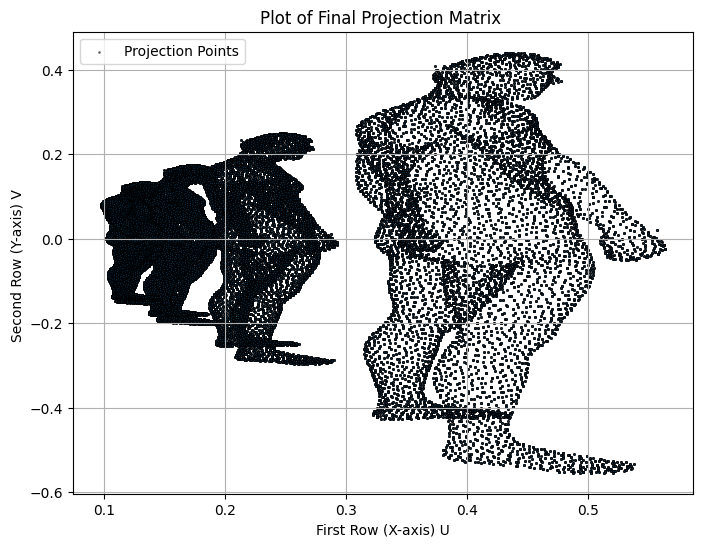

In [25]:
# Plot pojection points.
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, s=1, alpha=0.5, edgecolor='k', label="Projection Points")
plt.title("Plot of Final Projection Matrix ")
plt.xlabel("First Row (X-axis) U")
plt.ylabel("Second Row (Y-axis) V ")
plt.legend()
plt.grid(True)
plt.show()